<a href="https://colab.research.google.com/github/e-lprunier/Notebook_4A/blob/main/R%C3%A9duction_de_dimensionnalit%C3%A9_Clustering_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3 Dimensionality reduction

3.1 Iris data - guided

1

In [1]:
data(iris)
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [2]:
install.packages("ggplot2")
install.packages("rgl")
install.packages("plotly")
library(ggplot2)
library(plotly)
library(rgl)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘crosstalk’



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


This build of rgl does not include OpenGL functions.  Use
 rglwidget() to display results, e.g. via options(rgl.printRglwidget = TRUE).



In [4]:
install.packages("scatterplot3d")
library(scatterplot3d)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



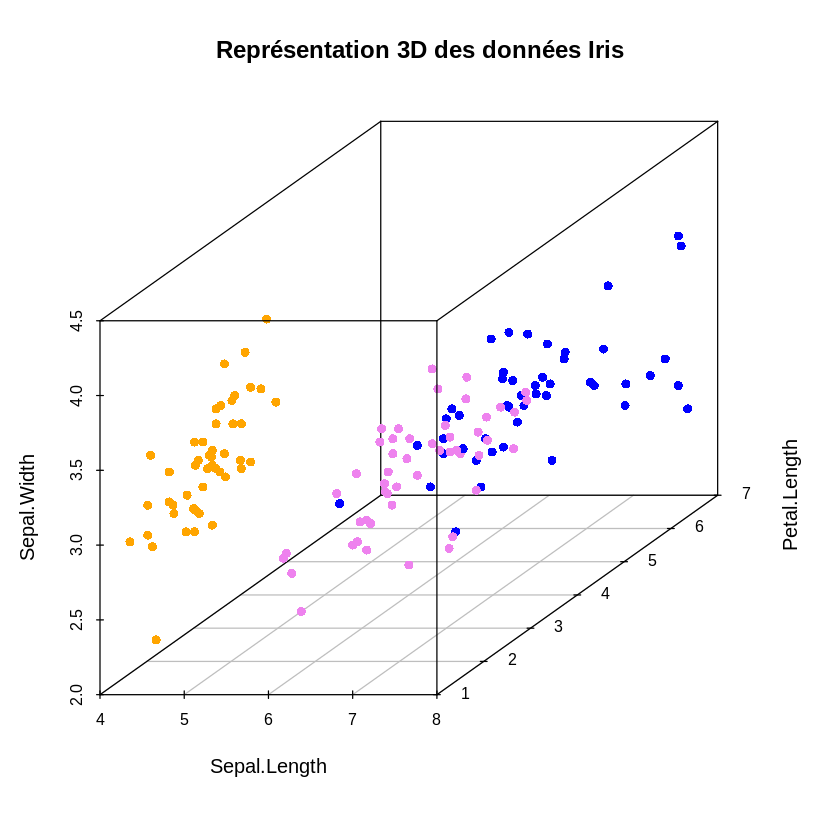

In [9]:
# Représentation 3D des données
colors <- c("setosa" = "orange", "versicolor" = "violet", "virginica" = "blue")
iris_colors <- colors[iris$Species]

# Représentation 3D des données avec des couleurs plus visibles
scatterplot3d(iris$Sepal.Length, iris$Petal.Length, iris$Sepal.Width,
              main="Représentation 3D des données Iris",
              xlab="Sepal.Length",
              ylab="Petal.Length",
              zlab="Sepal.Width",
              color=iris_colors, # Appliquer les couleurs définies
              pch = 16) # Utilisation de points pleins pour plus de visibilité


2

Réalisation de la PCA sans standardiser les données

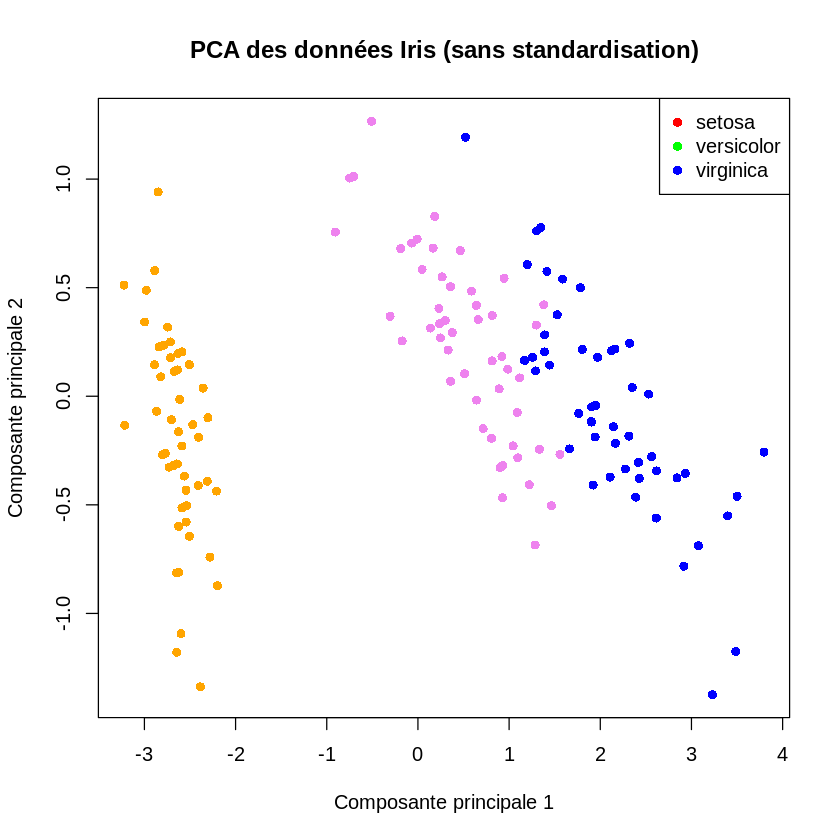

In [10]:
# Réalisation de la PCA sans standardisation
pca_iris <- prcomp(iris[, 1:4], center = TRUE, scale. = FALSE)

# Récupérer les coordonnées des individus sur les deux premières composantes
pca_iris_data <- as.data.frame(pca_iris$x)

# Représenter les individus sur les deux premières composantes principales
plot(pca_iris_data$PC1, pca_iris_data$PC2, col = iris_colors, pch = 16,
     xlab = "Composante principale 1", ylab = "Composante principale 2",
     main = "PCA des données Iris (sans standardisation)")
legend("topright", legend = levels(iris$Species), col = c("red", "green", "blue"), pch = 16)



Réalisation de la PCA avec standardisation des données

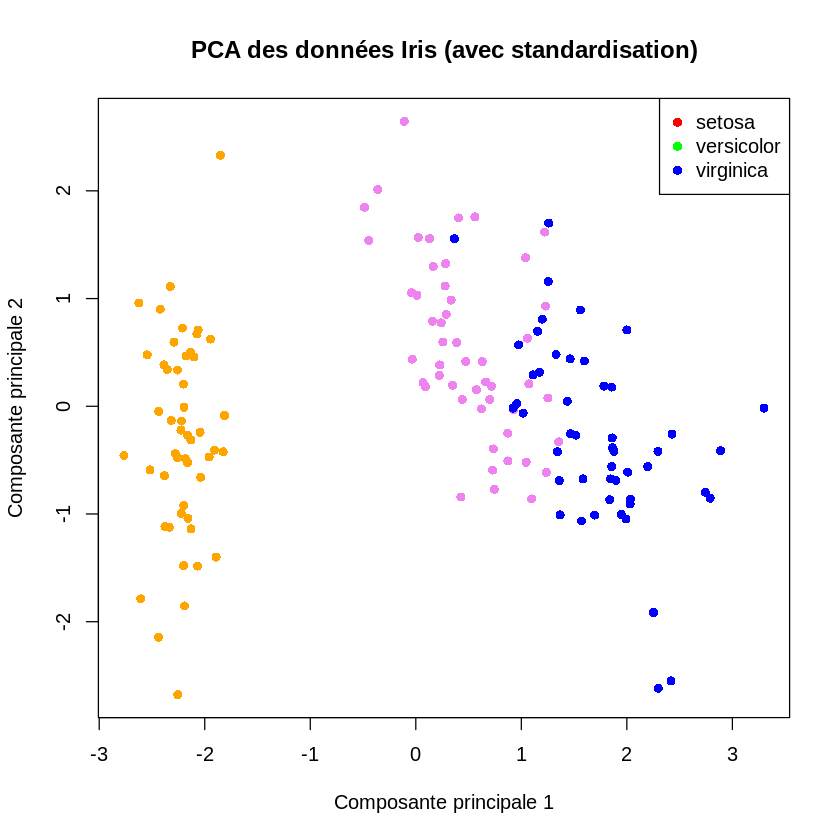

In [11]:
# Réalisation de la PCA avec standardisation
pca_iris_standardized <- prcomp(iris[, 1:4], center = TRUE, scale. = TRUE)

# Récupérer les coordonnées des individus sur les deux premières composantes
pca_iris_standardized_data <- as.data.frame(pca_iris_standardized$x)

# Représenter les individus sur les deux premières composantes principales
plot(pca_iris_standardized_data$PC1, pca_iris_standardized_data$PC2, col = iris_colors, pch = 16,
     xlab = "Composante principale 1", ylab = "Composante principale 2",
     main = "PCA des données Iris (avec standardisation)")
legend("topright", legend = levels(iris$Species), col = c("red", "green", "blue"), pch = 16)


La standardisation est essentielle lorsque les variables ont des échelles différentes (par exemple, une variable mesurée en millimètres et une autre en centimètres). Si les données ne sont pas standardisées, les variables avec des valeurs numériques plus grandes pourraient dominer l'analyse, faussant ainsi les résultats de la PCA. En standardisant, chaque variable est ramenée à une échelle comparable, ce qui permet une analyse plus équitable.

3

In [12]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [13]:
# Calcul des corrélations
cor_matrix <- cor(iris[, 1:4])
print(cor_matrix)

             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length    1.0000000  -0.1175698    0.8717538   0.8179411
Sepal.Width    -0.1175698   1.0000000   -0.4284401  -0.3661259
Petal.Length    0.8717538  -0.4284401    1.0000000   0.9628654
Petal.Width     0.8179411  -0.3661259    0.9628654   1.0000000


corrplot 0.94 loaded



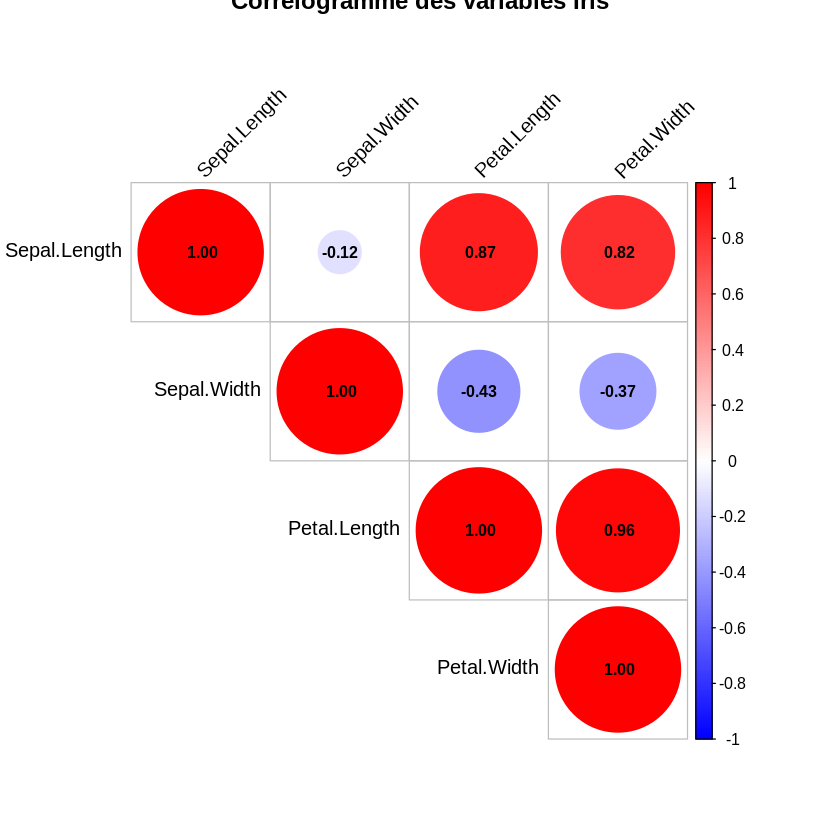

In [15]:
library(corrplot)

# Représentation du correlogramme
corrplot(cor_matrix, method = "circle", type = "upper", tl.col = "black", tl.srt = 45,
         addCoef.col = "black", number.cex = 0.8, col = colorRampPalette(c("blue", "white", "red"))(200),
         title = "Correlogramme des variables Iris")


Interprétation : ici la matrice de corrélation présente les coefficients de corrélation entre chaque paire de variables (entre 1 et -1). Un coefficient proche de 1 signifie une forte corrélation positive (par exemple ici avec Petal.Lenght et Petal.Width). Un coefficient proche de -1 signifie une forte corrélation négative tpar exemple entre sepal.width et petal.length). Un coefficient proche de 0 signifie peu ou pas de corrélation.

4

In [16]:
# Réalisation de la PCA avec standardisation
pca_iris <- prcomp(iris[, 1:4], center = TRUE, scale. = TRUE)